<a href="https://colab.research.google.com/github/xin1118/Image-Generation-awesome/blob/main/04_GED_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.3 MB/s eta 0:00:00


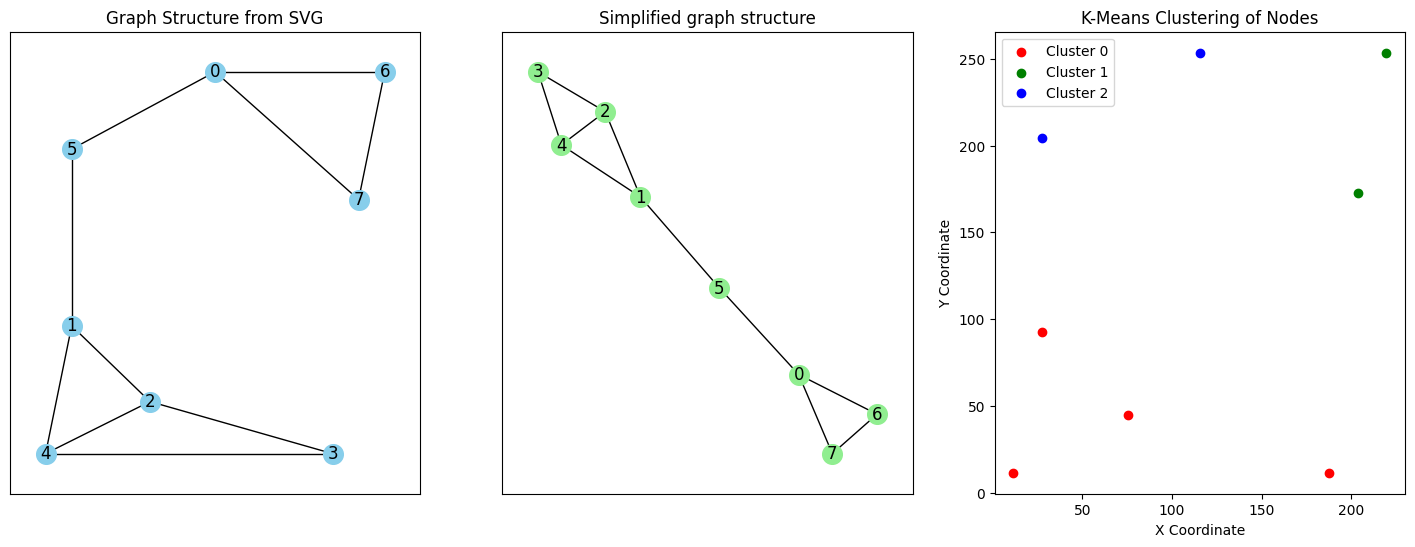

In [33]:
import xml.etree.ElementTree as ET
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 解析SVG文件
def parse_svg(svg_content):
    root = ET.fromstring(svg_content)
    G = nx.Graph()
    node_id = 0
    circle_nodes = {}
    line_edges = []

    # 处理圆形元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}circle':
            cx = float(element.attrib['cx'])
            cy = float(element.attrib['cy'])
            r = float(element.attrib['r'])
            G.add_node(node_id, type='circle', cx=cx, cy=cy, r=r)
            circle_nodes[node_id] = (cx, cy)
            node_id += 1

    # 处理直线元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}line':
            x1 = float(element.attrib['x1'])
            y1 = float(element.attrib['y1'])
            x2 = float(element.attrib['x2'])
            y2 = float(element.attrib['y2'])
            start_point = np.array([x1, y1])
            end_point = np.array([x2, y2])
            start_node = None
            end_node = None
            for node, (cx, cy) in circle_nodes.items():
                node_pos = np.array([cx, cy])
                start_distance = np.linalg.norm(node_pos - start_point)
                end_distance = np.linalg.norm(node_pos - end_point)
                if start_distance < 5:  # 距离阈值
                    start_node = node
                if end_distance < 5:
                    end_node = node
            if start_node is not None and end_node is not None:
                line_edges.append((start_node, end_node))

    # 将边添加到图中
    for edge in line_edges:
        G.add_edge(*edge)

    return G, circle_nodes

# 假设 SVG 内容存储在文件中
file_path = 'ex.txt'
try:
    with open(file_path, 'r') as file:
        svg_content = file.read()

    # 转换为图结构
    graph, circle_nodes = parse_svg(svg_content)

    # 根据SVG中的坐标确定节点位置
    pos = {node: (data['cx'], data['cy']) for node, data in graph.nodes(data=True)}

    # 绘制 Graph Structure from SVG
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].set_title("Graph Structure from SVG")
    nx.draw_networkx(graph, pos, node_size=200, node_color='skyblue', width=1, ax=axes[0])
    axes[0].axis('on')

    # 绘制 Simplified graph structure (showing connection relationships)
    new_pos = nx.spring_layout(graph)
    axes[1].set_title("Simplified graph structure")
    nx.draw_networkx(graph, new_pos, node_size=200, node_color='lightgreen', width=1, ax=axes[1])
    axes[1].axis('on')

    # 提取节点的位置特征
    node_positions = np.array([[data['cx'], data['cy']] for node, data in graph.nodes(data=True)])

    # 设置聚类的簇数，这里假设为 3，你可以根据实际情况调整
    num_clusters = 3
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(node_positions)

    # 获取聚类标签
    labels = kmeans.labels_

    # 绘制 K-Means Clustering of Nodes
    colors = ['r', 'g', 'b', 'c','m', 'y', 'k']
    axes[2].set_title("K-Means Clustering of Nodes")
    for i in range(num_clusters):
        cluster_nodes = node_positions[labels == i]
        axes[2].scatter(cluster_nodes[:, 0], cluster_nodes[:, 1], c=colors[i % len(colors)], label=f'Cluster {i}')
    axes[2].set_xlabel('X Coordinate')
    axes[2].set_ylabel('Y Coordinate')
    axes[2].legend()

    plt.show()

except FileNotFoundError:
    print(f"未找到 '{file_path}' 文件，请确保文件存在。")
except Exception as e:
    print(f"处理文件时出现错误: {e}")

添加节点 0，类型: circle，cx: 115.5，cy: 253.5，r: 11.5
添加节点 1，类型: circle，cx: 27.5，cy: 92.5，r: 11.5
添加节点 2，类型: circle，cx: 75.5，cy: 44.5，r: 11.5
添加节点 3，类型: circle，cx: 187.5，cy: 11.5，r: 11.5
添加节点 4，类型: circle，cx: 11.5，cy: 11.5，r: 11.5
添加节点 5，类型: circle，cx: 27.5，cy: 204.5，r: 11.5
添加节点 6，类型: circle，cx: 219.5，cy: 253.5，r: 11.5
添加节点 7，类型: circle，cx: 203.5，cy: 172.5，r: 11.5
添加边: 0 <---> 6
添加边: 5 <---> 0
添加边: 1 <---> 5
添加边: 2 <---> 1
添加边: 4 <---> 2
添加边: 4 <---> 1
添加边: 4 <---> 3
添加边: 3 <---> 2
添加边: 6 <---> 7
添加边: 0 <---> 7


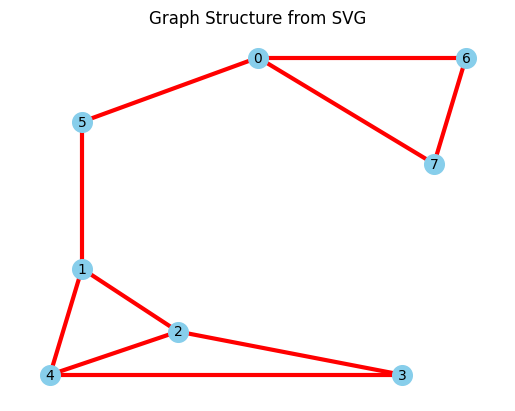

In [14]:
import xml.etree.ElementTree as ET
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 解析SVG文件
def parse_svg(svg_content):
    root = ET.fromstring(svg_content)
    G = nx.Graph()
    node_id = 0
    circle_nodes = {}
    line_edges = []

    # 处理圆形元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}circle':
            cx = float(element.attrib['cx'])
            cy = float(element.attrib['cy'])
            r = float(element.attrib['r'])
            G.add_node(node_id, type='circle', cx=cx, cy=cy, r=r)
            circle_nodes[node_id] = (cx, cy)
            print(f"添加节点 {node_id}，类型: circle，cx: {cx}，cy: {cy}，r: {r}")
            node_id += 1

    # 处理直线元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}line':
            x1 = float(element.attrib['x1'])
            y1 = float(element.attrib['y1'])
            x2 = float(element.attrib['x2'])
            y2 = float(element.attrib['y2'])
            start_point = np.array([x1, y1])
            end_point = np.array([x2, y2])
            start_node = None
            end_node = None
            for node, (cx, cy) in circle_nodes.items():
                node_pos = np.array([cx, cy])
                start_distance = np.linalg.norm(node_pos - start_point)
                end_distance = np.linalg.norm(node_pos - end_point)
                if start_distance < 5:  # 距离阈值
                    start_node = node
                if end_distance < 5:
                    end_node = node
            if start_node is not None and end_node is not None:
                line_edges.append((start_node, end_node))
                print(f"添加边: {start_node} <---> {end_node}")

    # 将边添加到图中
    for edge in line_edges:
        G.add_edge(*edge)

    return G, circle_nodes

# 读取txt文件中的SVG内容
try:
    file_path = 'ex.txt'  # 请将此替换为实际的txt文件路径
    with open(file_path, 'r') as file:
        svg_content = file.read()

    # 转换为图结构
    graph, circle_nodes = parse_svg(svg_content)

    # 根据SVG中的坐标确定节点位置
    pos = {node: (data['cx'], data['cy']) for node, data in graph.nodes(data=True)}

    # 绘制图结构
    node_size = 200
    edge_width = 3

    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color='skyblue')
    nx.draw_networkx_edges(graph, pos, width=edge_width, edge_color='red')
    nx.draw_networkx_labels(graph, pos, font_size=10, font_family='sans-serif')

    plt.title("Graph Structure from SVG")
    plt.axis('off')

    # 调整绘图范围
    x_coords = [pos[node][0] for node in graph.nodes()]
    y_coords = [pos[node][1] for node in graph.nodes()]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    padding = 20  # 可根据需要调整
    plt.xlim(x_min - padding, x_max + padding)
    plt.ylim(y_min - padding, y_max + padding)

    plt.show()
except FileNotFoundError:
    print(f"未找到 '{file_path}' 文件，请确保文件存在。")
except Exception as e:
    print(f"处理文件时出现错误: {e}")

In [15]:
# 假设文件路径为 your_file.txt，请根据实际情况修改
file_path = 'ex.txt'
import xml.etree.ElementTree as ET
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 解析SVG文件
def parse_svg(svg_content):
    root = ET.fromstring(svg_content)
    G = nx.Graph()
    node_id = 0
    circle_nodes = {}
    line_edges = []

    # 处理圆形元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}circle':
            cx = float(element.attrib['cx'])
            cy = float(element.attrib['cy'])
            r = float(element.attrib['r'])
            G.add_node(node_id, type='circle', cx=cx, cy=cy, r=r)
            circle_nodes[node_id] = (cx, cy)
            print(f"添加节点 {node_id}，类型: circle，cx: {cx}，cy: {cy}，r: {r}")
            node_id += 1

    # 处理直线元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}line':
            x1 = float(element.attrib['x1'])
            y1 = float(element.attrib['y1'])
            x2 = float(element.attrib['x2'])
            y2 = float(element.attrib['y2'])
            start_point = np.array([x1, y1])
            end_point = np.array([x2, y2])
            start_node = None
            end_node = None
            for node, (cx, cy) in circle_nodes.items():
                node_pos = np.array([cx, cy])
                start_distance = np.linalg.norm(node_pos - start_point)
                end_distance = np.linalg.norm(node_pos - end_point)
                if start_distance < 5:  # 距离阈值
                    start_node = node
                if end_distance < 5:
                    end_node = node
            if start_node is not None and end_node is not None:
                line_edges.append((start_node, end_node))
                print(f"添加边: {start_node} <---> {end_node}")

    # 将边添加到图中
    for edge in line_edges:
        G.add_edge(*edge)

    return G, circle_nodes

# 读取txt文件中的SVG内容
try:
    with open(file_path, 'r') as file:
        svg_content = file.read()

    # 转换为图结构
    graph, circle_nodes = parse_svg(svg_content)

    # 根据SVG中的坐标确定节点位置
    pos = {node: (data['cx'], data['cy']) for node, data in graph.nodes(data=True)}
except FileNotFoundError:
    print(f"未找到 '{file_path}' 文件，请确保文件存在。")
except Exception as e:
    print(f"处理文件时出现错误: {e}")

添加节点 0，类型: circle，cx: 115.5，cy: 253.5，r: 11.5
添加节点 1，类型: circle，cx: 27.5，cy: 92.5，r: 11.5
添加节点 2，类型: circle，cx: 75.5，cy: 44.5，r: 11.5
添加节点 3，类型: circle，cx: 187.5，cy: 11.5，r: 11.5
添加节点 4，类型: circle，cx: 11.5，cy: 11.5，r: 11.5
添加节点 5，类型: circle，cx: 27.5，cy: 204.5，r: 11.5
添加节点 6，类型: circle，cx: 219.5，cy: 253.5，r: 11.5
添加节点 7，类型: circle，cx: 203.5，cy: 172.5，r: 11.5
添加边: 0 <---> 6
添加边: 5 <---> 0
添加边: 1 <---> 5
添加边: 2 <---> 1
添加边: 4 <---> 2
添加边: 4 <---> 1
添加边: 4 <---> 3
添加边: 3 <---> 2
添加边: 6 <---> 7
添加边: 0 <---> 7


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas

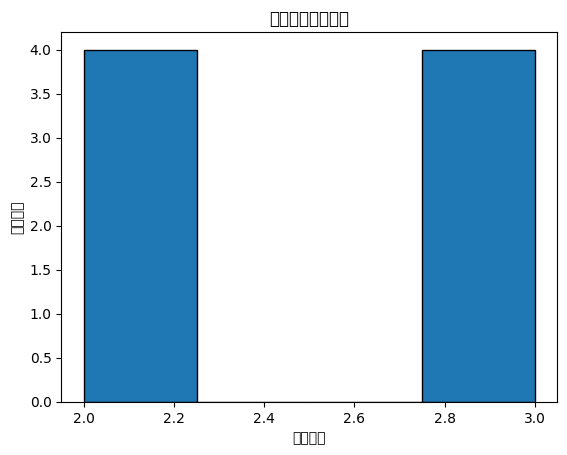

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# 计算每个节点的度
node_degrees = dict(graph.degree())
degrees = list(node_degrees.values())

# 绘制直方图
plt.hist(degrees, bins='auto', edgecolor='black')
plt.xlabel('节点的度')
plt.ylabel('节点数量')
plt.title('节点度分布直方图')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas

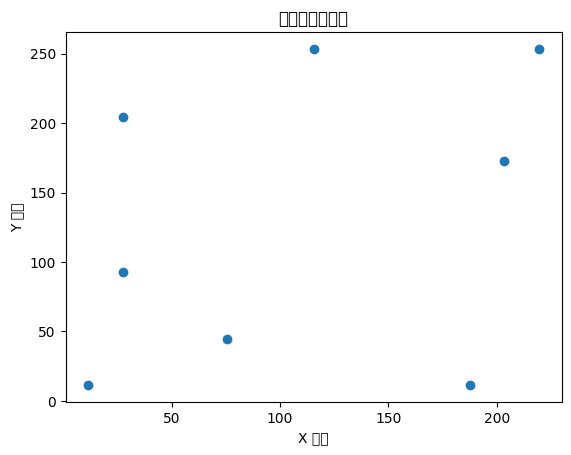

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

# 获取节点的坐标
x_coords = [pos[node][0] for node in graph.nodes()]
y_coords = [pos[node][1] for node in graph.nodes()]

# 绘制散点图
plt.scatter(x_coords, y_coords)
plt.xlabel('X 坐标')
plt.ylabel('Y 坐标')
plt.title('节点位置散点图')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  fig.canvas

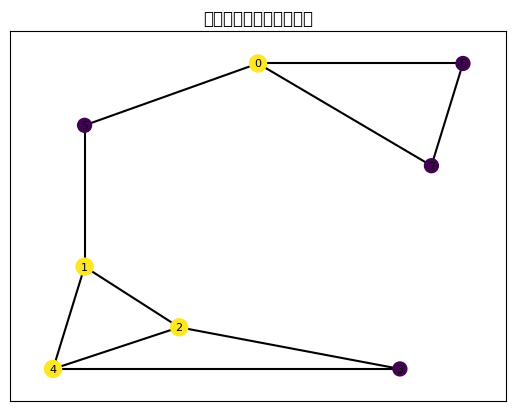

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# 根据节点的度设置节点颜色（颜色越亮表示度越高）
node_sizes = [d * 50 for d in list(dict(graph.degree()).values())]
node_colors = [d for d in list(dict(graph.degree()).values())]

# 绘制图
nx.draw_networkx(graph, pos, node_size=node_sizes, node_color=node_colors, cmap='viridis', with_labels=True, font_size=8, width=1.5)
plt.title('带节点度信息的图可视化')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30701 (\N{CJK UNIFIED IDEOGRAPH-77ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24452 (\N{CJK UNIFIED IDEOGRAPH-5F84}) missing from font(s) DejaVu Sans.
  fig.canvas

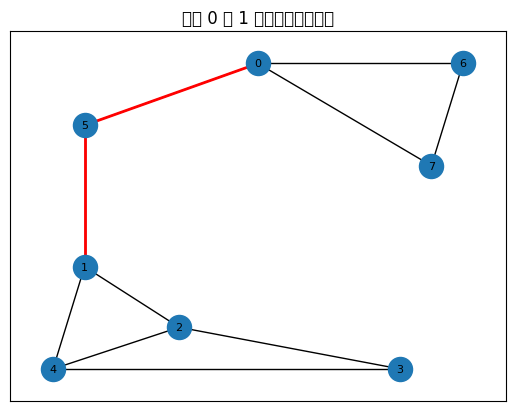

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

# 选择两个节点
source_node = list(graph.nodes())[0]
target_node = list(graph.nodes())[1]

try:
    shortest_path = nx.shortest_path(graph, source=source_node, target=target_node)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

    # 绘制图
    nx.draw_networkx(graph, pos, with_labels=True, font_size=8, width=1)

    # 突出显示最短路径的边
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title(f'节点 {source_node} 到 {target_node} 的最短路径可视化')
    plt.show()
except nx.NetworkXNoPath:
    print(f"节点 {source_node} 到 {target_node} 没有路径")

In [26]:
import networkx as nx
import numpy as np

# 获取图的节点列表
nodes = list(graph.nodes())
num_nodes = len(nodes)

# 初始化邻接矩阵
adj_matrix = np.zeros((num_nodes, num_nodes))

# 填充邻接矩阵
for edge in graph.edges():
    u, v = edge
    i = nodes.index(u)
    j = nodes.index(v)
    adj_matrix[i][j] = 1
    adj_matrix[j][i] = 1

print("邻接矩阵:")
print(adj_matrix)

邻接矩阵:
[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0.]]


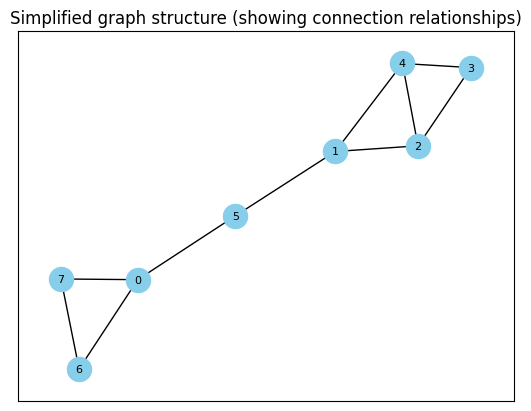

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# 使用 spring_layout 重新布局节点
new_pos = nx.spring_layout(graph)

# 绘制图
nx.draw_networkx(graph, new_pos, with_labels=True, font_size=8, node_size=300, node_color='skyblue', width=1)
plt.title('Simplified graph structure (showing connection relationships)')#简化的图结构（展示连接关系）
plt.show()

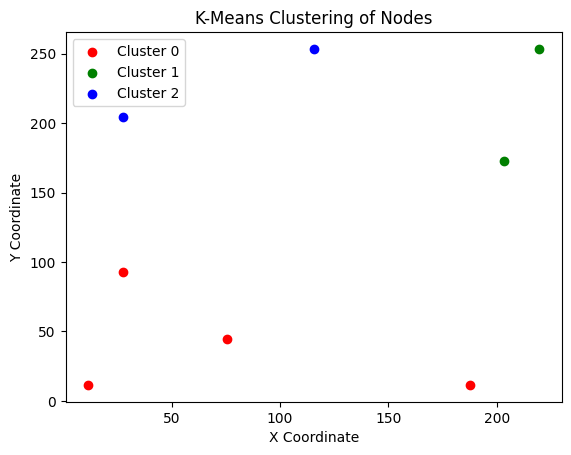

In [30]:
import xml.etree.ElementTree as ET
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 解析SVG文件
def parse_svg(svg_content):
    root = ET.fromstring(svg_content)
    G = nx.Graph()
    node_id = 0
    circle_nodes = {}
    line_edges = []

    # 处理圆形元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}circle':
            cx = float(element.attrib['cx'])
            cy = float(element.attrib['cy'])
            r = float(element.attrib['r'])
            G.add_node(node_id, type='circle', cx=cx, cy=cy, r=r)
            circle_nodes[node_id] = (cx, cy)
            node_id += 1

    # 处理直线元素
    for element in root.iter():
        if element.tag == '{http://www.w3.org/2000/svg}line':
            x1 = float(element.attrib['x1'])
            y1 = float(element.attrib['y1'])
            x2 = float(element.attrib['x2'])
            y2 = float(element.attrib['y2'])
            start_point = np.array([x1, y1])
            end_point = np.array([x2, y2])
            start_node = None
            end_node = None
            for node, (cx, cy) in circle_nodes.items():
                node_pos = np.array([cx, cy])
                start_distance = np.linalg.norm(node_pos - start_point)
                end_distance = np.linalg.norm(node_pos - end_point)
                if start_distance < 5:  # 距离阈值
                    start_node = node
                if end_distance < 5:
                    end_node = node
            if start_node is not None and end_node is not None:
                line_edges.append((start_node, end_node))

    # 将边添加到图中
    for edge in line_edges:
        G.add_edge(*edge)

    return G, circle_nodes

# 假设 SVG 内容存储在文件中
file_path = 'ex.txt'
try:
    with open(file_path, 'r') as file:
        svg_content = file.read()

    # 转换为图结构
    graph, circle_nodes = parse_svg(svg_content)

    # 提取节点的位置特征
    node_positions = np.array([[data['cx'], data['cy']] for node, data in graph.nodes(data=True)])

    # 设置聚类的簇数，这里假设为 3，你可以根据实际情况调整
    num_clusters = 3
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(node_positions)

    # 获取聚类标签
    labels = kmeans.labels_

    # 可视化聚类结果
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i in range(num_clusters):
        cluster_nodes = node_positions[labels == i]
        plt.scatter(cluster_nodes[:, 0], cluster_nodes[:, 1], c=colors[i % len(colors)], label=f'Cluster {i}')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('K-Means Clustering of Nodes')
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"未找到 '{file_path}' 文件，请确保文件存在。")
except Exception as e:
    print(f"处理文件时出现错误: {e}")

In [16]:
# 计算节点之间的平均距离
node_positions = np.array([pos[node] for node in graph.nodes()])
num_nodes = len(node_positions)
distances = []
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        dist = np.linalg.norm(node_positions[i] - node_positions[j])
        distances.append(dist)
average_distance = np.mean(distances)
print(f"节点之间的平均距离: {average_distance}")

# 判断节点分布情况（简单示例，可进一步优化）
if len(distances) > 0:
    std_distance = np.std(distances)
    if std_distance < average_distance * 0.2:  # 简单阈值判断，可调整
        print("节点分布相对均匀")
    else:
        print("节点分布不均匀，可能存在集中区域")

节点之间的平均距离: 177.44066412716512
节点分布不均匀，可能存在集中区域


In [17]:
# 分析圆形节点的半径大小
radii = [data['r'] for node, data in graph.nodes(data=True)]
min_radius = min(radii)
max_radius = max(radii)
print(f"最小半径: {min_radius}, 最大半径: {max_radius}")

# 这里可以进一步添加判断图形整体形状对称性或规律性的代码
# 由于当前图结构简单，可通过人工观察或更复杂的算法实现

最小半径: 11.5, 最大半径: 11.5


In [18]:
# 使用深度优先搜索判断连通性
def is_connected(graph, source, target):
    visited = set()
    stack = [source]
    while stack:
        node = stack.pop()
        visited.add(node)
        if node == target:
            return True
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                stack.append(neighbor)
    return False

# 测试一些节点对的连通性
source_node = list(graph.nodes())[0]
target_node = list(graph.nodes())[1]
print(f"节点 {source_node} 和 {target_node} 是否连通: {is_connected(graph, source_node, target_node)}")

节点 0 和 1 是否连通: True


In [19]:
# 寻找节点之间的最短路径
source_node = list(graph.nodes())[0]
target_node = list(graph.nodes())[1]
try:
    shortest_path = nx.shortest_path(graph, source=source_node, target=target_node)
    print(f"节点 {source_node} 到 {target_node} 的最短路径: {shortest_path}")
    print(f"最短路径长度: {len(shortest_path) - 1}")
except nx.NetworkXNoPath:
    print(f"节点 {source_node} 到 {target_node} 没有路径")

节点 0 到 1 的最短路径: [0, 5, 1]
最短路径长度: 2


In [20]:
# 计算每个节点的度
node_degrees = dict(graph.degree())
sorted_degrees = sorted(node_degrees.items(), key=lambda item: item[1], reverse=True)
print("节点的度中心性（从高到低）:")
for node, degree in sorted_degrees:
    print(f"节点 {node}: 度 = {degree}")

节点的度中心性（从高到低）:
节点 0: 度 = 3
节点 1: 度 = 3
节点 2: 度 = 3
节点 4: 度 = 3
节点 3: 度 = 2
节点 5: 度 = 2
节点 6: 度 = 2
节点 7: 度 = 2


In [21]:
# 假设SVG的宽度和高度从文件中获取或已知，这里简单模拟
width = 231  # 替换为实际宽度
height = 265  # 替换为实际高度

# 计算节点和边所占据的空间范围
x_min = min(x_coords)
x_max = max(x_coords)
y_min = min(y_coords)
y_max = max(y_coords)

occupied_width = x_max - x_min
occupied_height = y_max - y_min

space_utilization_x = occupied_width / width
space_utilization_y = occupied_height / height

print(f"X 方向空间利用率: {space_utilization_x}")
print(f"Y 方向空间利用率: {space_utilization_y}")

# 根据利用率判断空间是否合理利用（可自定义阈值）
if space_utilization_x < 0.3 or space_utilization_y < 0.3:
    print("空间利用不充分，存在较空旷区域")
elif space_utilization_x > 0.8 or space_utilization_y > 0.8:
    print("空间过于拥挤")
else:
    print("空间利用相对合理")

X 方向空间利用率: 0.9004329004329005
Y 方向空间利用率: 0.9132075471698113
空间过于拥挤
